# New Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Travel.csv')
df = data.copy()
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
# Mengubah fe male menjadi female
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.rename_categories({'Fe Male': 'female'})
df['Gender'] = df['Gender'].str.lower()
df['Gender'].value_counts()

male      2916
female    1972
Name: Gender, dtype: int64

In [4]:
# Mengelompokkan unmarried dan single ke dalam kategori single
df['MaritalStatus'] = df['MaritalStatus'].replace(['Unmarried'], 'Single')
df['MaritalStatus'].value_counts()

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64

# Membuang fitur yang tidak digunakan
df.drop(columns=['CustomerID'],inplace = True)

In [5]:
# Melihat kolom-kolom yang masih mempunyai missing values
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
# Melihat persentase missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

In [7]:
# Menghapus baris yang mengandung missing values < 1%
df = df.dropna(subset=['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar'])

In [8]:
# Mengisi missing values pada kolom 'Age' dan 'DurationOfPitch' dengan mean karena distribusinya mendekati normal, dan mengisi nilai median untuk kolom 'MonthlyIncome' karena skew positif
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [9]:
# Mengisi missing values pada kolom 'NumberOfTrips', 'NumberOfChildrenVisiting', 'PreferredPropertyStar' dengan nilai modus
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0], inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

In [10]:
# Memeriksa apakah masih ada kolom dengan missing values
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [11]:
# Pengecekan data duplikat
df.duplicated().sum()

0

In [12]:
# Menghapus data duplikat
df.drop_duplicates(inplace = True)

In [13]:
# Pengecekan data duplikat kembali untuk memastikan sudah terhapus semua
df.duplicated().sum()

0

In [14]:
# Melihat jumlah baris setelah menghapus data duplikat
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4792 non-null   int64  
 1   ProdTaken                 4792 non-null   int64  
 2   Age                       4792 non-null   float64
 3   TypeofContact             4792 non-null   object 
 4   CityTier                  4792 non-null   int64  
 5   DurationOfPitch           4792 non-null   float64
 6   Occupation                4792 non-null   object 
 7   Gender                    4792 non-null   object 
 8   NumberOfPersonVisiting    4792 non-null   int64  
 9   NumberOfFollowups         4792 non-null   float64
 10  ProductPitched            4792 non-null   object 
 11  PreferredPropertyStar     4792 non-null   float64
 12  MaritalStatus             4792 non-null   object 
 13  NumberOfTrips             4792 non-null   float64
 14  Passport

In [15]:
# Memeriksa persebaran outlier
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']].describe())


Persebaran data sebelum ditangani Outlier: 
       DurationOfPitch  NumberOfTrips  MonthlyIncome  NumberOfFollowups  \
count      4792.000000    4792.000000    4792.000000        4792.000000   
mean         15.512484       3.199917   23507.280050           3.706177   
std           8.335067       1.831135    5082.923333           0.999091   
min           5.000000       1.000000    1000.000000           1.000000   
25%           9.000000       2.000000   20582.000000           3.000000   
50%          14.000000       3.000000   22368.500000           4.000000   
75%          19.000000       4.000000   25407.750000           4.000000   
max         127.000000      22.000000   98678.000000           6.000000   

       NumberOfPersonVisiting  
count             4792.000000  
mean                 2.909015  
std                  0.723279  
min                  1.000000  
25%                  2.000000  
50%                  3.000000  
75%                  3.000000  
max                  5.

In [16]:
# Menangani outlier dengan metode IQR
Q1 = (df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']]).quantile(0.25)
Q3 = (df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']]).quantile(0.75)

IQR = Q3 - Q1
print('Nilai IQR dari masing-masing Variable adalah: ')
print(IQR)

maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('Nilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']].describe())

Nilai IQR dari masing-masing Variable adalah: 
DurationOfPitch             10.00
NumberOfTrips                2.00
MonthlyIncome             4825.75
NumberOfFollowups            1.00
NumberOfPersonVisiting       1.00
dtype: float64
Nilai Maximum dari masing-masing Variable adalah: 
DurationOfPitch              34.000
NumberOfTrips                 7.000
MonthlyIncome             32646.375
NumberOfFollowups             5.500
NumberOfPersonVisiting        4.500
dtype: float64
Nilai Minimum dari masing-masing Variable adalah: 
DurationOfPitch              -6.000
NumberOfTrips                -1.000
MonthlyIncome             13343.375
NumberOfFollowups             1.500
NumberOfPersonVisiting        0.500
dtype: float64

Persebaran data setelah ditangani Outlier: 
       DurationOfPitch  NumberOfTrips  MonthlyIncome  NumberOfFollowups  \
count      4792.000000    4792.000000    4792.000000        4792.000000   
mean         15.442367       3.166945   23290.612557           3.710559   
std   

In [17]:
cats = ['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus', 'Designation', 'Gender']
df[cats].describe()

,TypeofContact,Occupation,ProductPitched,MaritalStatus,Designation,Gender
count,4792,4792,4792,4792,4792,4792
unique,2,4,5,3,5,2
top,Self Enquiry,Salaried,Basic,Married,Executive,male
freq,3392,2327,1818,2292,1818,2859


In [18]:
# Melihat values dari kolom-kolom kategorikal
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3392
Company Invited    1400
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2327
Small Business    2033
Large Business     430
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom ProductPitched:
Basic           1818
Deluxe          1684
Standard         741
Super Deluxe     342
King             207
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married     2292
Single      1567
Divorced     933
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1818
Manager           1684
Senior Manager     741
AVP                342
VP                 207
Name: Designation, dtype: int64

Value count kolom Gender:
male      2859
female    1933
Name: Gender, dtype: int64



In [19]:
# Label encoding
mapping_ProductPitched = {
    'Basic' : 0,
    'Standard' : 1,
    'Deluxe' : 2,
    'Super Deluxe' : 3,
    'King' : 4   
}

mapping_Designation = {
    'Executive' : 0,
    'Manager' : 1,
    'Senior Manager' : 2,
    'AVP' : 3,
    'VP' : 4   
}
mapping_MaritalStatus = {
    'Married' : 0,
    'Single' : 1,
    'Divorced' : 2,
}

df['ProductPitched'] = df['ProductPitched'].map(mapping_ProductPitched)
df['Designation'] = df['Designation'].map(mapping_Designation)
df['MaritalStatus'] = df['MaritalStatus'].map(mapping_MaritalStatus)

In [20]:
# One hot encoding
for cat in ['TypeofContact', 'Occupation', 'Gender']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [21]:
# Menghapus kolom yang outdated setelah feature encoding
df = df.drop(columns= ['TypeofContact', 'Occupation', 'Gender'])

In [22]:
# Pengecekan kolom-kolom setelah feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4887
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     4792 non-null   int64  
 1   ProdTaken                      4792 non-null   int64  
 2   Age                            4792 non-null   float64
 3   CityTier                       4792 non-null   int64  
 4   DurationOfPitch                4792 non-null   float64
 5   NumberOfPersonVisiting         4792 non-null   float64
 6   NumberOfFollowups              4792 non-null   float64
 7   ProductPitched                 4792 non-null   int64  
 8   PreferredPropertyStar          4792 non-null   float64
 9   MaritalStatus                  4792 non-null   int64  
 10  NumberOfTrips                  4792 non-null   float64
 11  Passport                       4792 non-null   int64  
 12  PitchSatisfactionScore         4792 non-null   i

In [23]:
# Split Feature and Label
X = df.drop(columns=['ProdTaken'])
y = df['ProdTaken'] # target / label

In [24]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X.columns)

In [25]:
# melihat jumlah prodtaken di data train
print(pd.Series(y_train).value_counts())

0    2707
1     647
Name: ProdTaken, dtype: int64


In [26]:
# melihat jumlah prodtaken di data test
print(pd.Series(y_test).value_counts())

0    1182
1     256
Name: ProdTaken, dtype: int64


In [27]:
#handle imbalance data train
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    2707
1    2707
Name: ProdTaken, dtype: int64


In [28]:
X_over_SMOTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5414 entries, 0 to 5413
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     5414 non-null   int64  
 1   Age                            5414 non-null   float64
 2   CityTier                       5414 non-null   int64  
 3   DurationOfPitch                5414 non-null   float64
 4   NumberOfPersonVisiting         5414 non-null   float64
 5   NumberOfFollowups              5414 non-null   float64
 6   ProductPitched                 5414 non-null   int64  
 7   PreferredPropertyStar          5414 non-null   float64
 8   MaritalStatus                  5414 non-null   int64  
 9   NumberOfTrips                  5414 non-null   float64
 10  Passport                       5414 non-null   int64  
 11  PitchSatisfactionScore         5414 non-null   int64  
 12  OwnCar                         5414 non-null   i

# aggregat passport

In [42]:
passport_agg = X_over_SMOTE.groupby(['Passport']).agg({'CustomerID' : 'nunique'})
passport_agg = passport_agg.reset_index()
passport_agg

,Passport,CustomerID
0,0,2952
1,1,1427


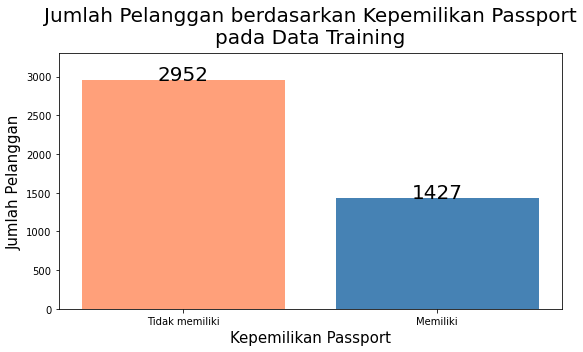

''

In [44]:
plt.figure(figsize=(8,5))
ax = plt.bar(x='Passport', height='CustomerID', data=passport_agg, color=['lightsalmon', 'steelblue'])
plt.title('Jumlah Pelanggan berdasarkan Kepemilikan Passport\npada Data Training', loc='center', pad=10, fontsize=20)
plt.xlabel('Kepemilikan Passport', fontsize = 15)
plt.ylabel('Jumlah Pelanggan', fontsize = 15)
plt.xticks((0, 1), ('Tidak memiliki', 'Memiliki'))
for index,data in enumerate(passport_agg['CustomerID']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20), ha='center')
plt.ylim([0, 3300])
plt.tight_layout()
plt.savefig('passport_agg.png', dpi=200)
plt.show()
;

# aggregat ProductPitched

In [124]:
X_over_SMOTE['ProductPitched'] = X_over_SMOTE['ProductPitched'].astype(str)
viz4 = X_over_SMOTE.groupby(['ProductPitched'])['CustomerID'].nunique().reset_index().sort_values(by='CustomerID', ascending=False)
viz4.columns = ['ProductPitched', 'total_user']
viz4

,ProductPitched,total_user
0,0,1971
2,2,1408
1,1,880
3,3,283
4,4,177


In [125]:
new_index =[0,1,2,3,4]
viz4 = viz4.sort_values(by='total_user', ascending=False).reset_index()
viz4

,index,ProductPitched,total_user
0,0,0,1971
1,2,2,1408
2,1,1,880
3,3,3,283
4,4,4,177


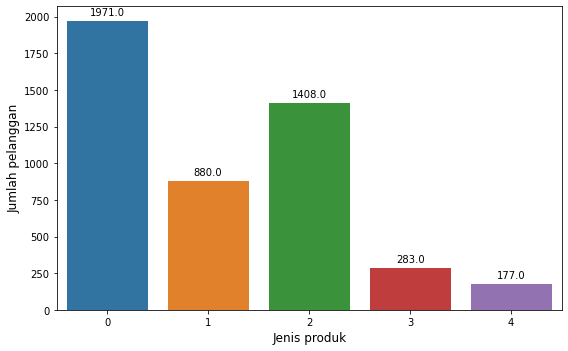

In [98]:
plt.figure(figsize=(8,5))
splot = sns.barplot(data=viz4, x='ProductPitched', y='total_user') 
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9),
                   textcoords = 'offset points')
    
plt.xlabel('Jenis produk', fontsize=12) 
plt.ylabel('Jumlah pelanggan', fontsize = 12)
plt.tight_layout()
plt.savefig('insight 1.jpg', dpi=150)

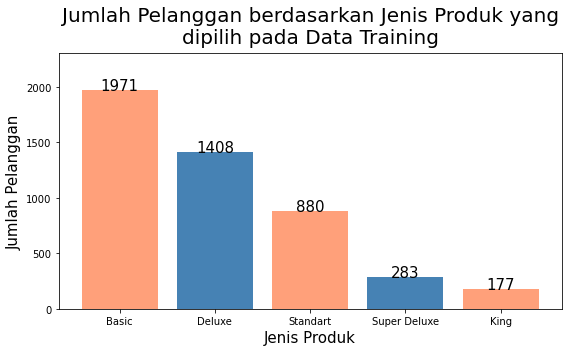

''

In [127]:
plt.clf
plt.figure(figsize=(8,5))
ax = plt.bar(x='ProductPitched', height='total_user', data=viz4, color=['lightsalmon', 'steelblue'])
plt.title('Jumlah Pelanggan berdasarkan Jenis Produk yang\ndipilih pada Data Training', loc='center', pad=10, fontsize=20)
plt.xlabel('Jenis Produk', fontsize = 15)
plt.ylabel('Jumlah Pelanggan', fontsize = 15)

for index,data in enumerate(viz4['total_user']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')
plt.xticks((0,1,2,3,4) , ( 'Basic','Deluxe','Standart', 'Super Deluxe', 'King'))
plt.ylim([0, 2300])
plt.tight_layout()
plt.savefig('ProductPitched_agg.png', dpi=200)
plt.show()
;

# aggregat CityTier

In [120]:
X_over_SMOTE['CityTier'] = X_over_SMOTE['CityTier'].astype(str)
CityTier_agg = X_over_SMOTE.groupby(['CityTier'])['CustomerID'].nunique().reset_index().sort_values(by='CustomerID', ascending=False)
CityTier_agg.columns = ['CityTier', 'total_user']
CityTier_agg

,CityTier,total_user
0,1,2729
2,3,1314
1,2,589


In [122]:
new_index =[0,1,2]
Cityviz = CityTier_agg.sort_values(by='total_user', ascending=False).reset_index()
Cityviz

,index,CityTier,total_user
0,0,1,2729
1,2,3,1314
2,1,2,589


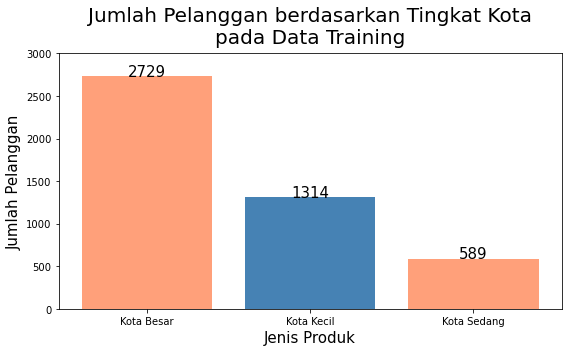

''

In [131]:
plt.clf
plt.figure(figsize=(8,5))
ax = plt.bar(x='CityTier', height='total_user', data=Cityviz, color=['lightsalmon', 'steelblue'])
plt.title('Jumlah Pelanggan berdasarkan Tingkat Kota\npada Data Training', loc='center', pad=10, fontsize=20)
plt.xlabel('Jenis Produk', fontsize = 15)
plt.ylabel('Jumlah Pelanggan', fontsize = 15)

for index,data in enumerate(Cityviz['total_user']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')
plt.xticks((0,1,2) , ( 'Kota Besar','Kota Kecil','Kota Sedang'))
plt.ylim([0, 3000])
plt.tight_layout()
plt.savefig('CityTier_agg.png', dpi=200)
plt.show()
;

# aggregat MaritalStatus

In [ ]:
  'Married' : 0,
    'Single' : 1,
    'Divorced' : 2,

In [30]:
MaritalStatus_agg = X_over_SMOTE.groupby(['MaritalStatus']).agg({'CustomerID' : 'nunique'})
MaritalStatus_agg = MaritalStatus_agg.reset_index()
MaritalStatus_agg

,MaritalStatus,CustomerID
0,0,2168
1,1,1650
2,2,702


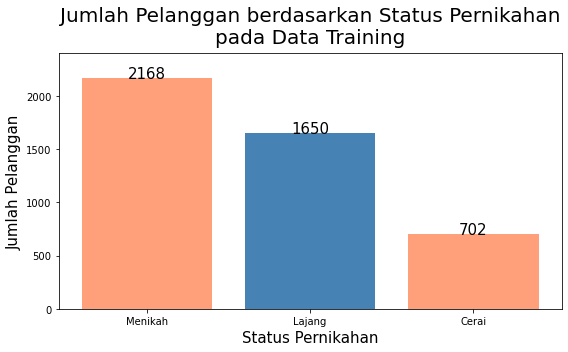

''

In [39]:
plt.figure(figsize=(8,5))
ax = plt.bar(x='MaritalStatus', height='CustomerID', data=MaritalStatus_agg, color=['lightsalmon', 'steelblue', 'lightsalmon'])
plt.title('Jumlah Pelanggan berdasarkan Status Pernikahan\npada Data Training', loc='center', pad=10, fontsize=20)
plt.xlabel('Status Pernikahan', fontsize = 15)
plt.ylabel('Jumlah Pelanggan', fontsize = 15)
plt.xticks((0,1,2), ('Menikah', 'Lajang', 'Cerai'))
for index,data in enumerate(MaritalStatus_agg['CustomerID']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')
plt.ylim([0, 2400])
plt.tight_layout()
plt.savefig('MaritalStatus_agg.png', dpi=200)
plt.show()
;

# aggregation Designation

In [31]:
Designation_agg = X_over_SMOTE.groupby(['Designation']).agg({'CustomerID' : 'nunique'})
Designation_agg = Designation_agg.reset_index()
Designation_agg

,Designation,CustomerID
0,0,1991
1,1,1536
2,2,706
3,3,282
4,4,177


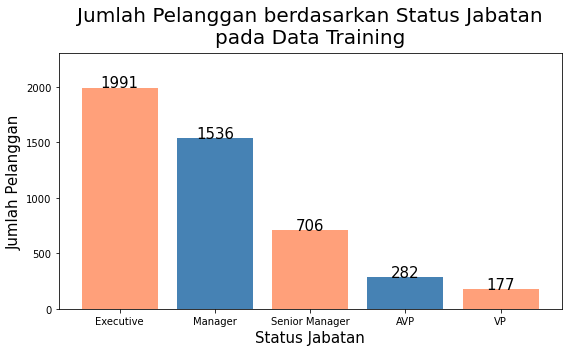

''

In [41]:
plt.figure(figsize=(8,5))
ax = plt.bar(x='Designation', height='CustomerID', data=Designation_agg, color=['lightsalmon', 'steelblue'])
plt.title('Jumlah Pelanggan berdasarkan Status Jabatan\npada Data Training', loc='center', pad=10, fontsize=20)
plt.xlabel('Status Jabatan', fontsize = 15)
plt.ylabel('Jumlah Pelanggan', fontsize = 15)
plt.xticks((0,1,2,3,4), ('Executive', 'Manager', 'Senior Manager', 'AVP', 'VP'))
for index,data in enumerate(Designation_agg['CustomerID']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')
plt.ylim([0, 2300])
plt.tight_layout()
plt.savefig('Designation_agg.png', dpi=200)
plt.show()
;